## TSF GRIP DATA SCIENCE AND BUSINESS ANALYTICS INTERN


# Task 1 : <span style="color: black;">Prediction using Supervised ML</span> (<span style="color: black;">Linear Regression</span>)






### Author : Aishani Aarya


### Problem Statement:

**Predict the perecentage of the student based on the no. of hours student studied using Simple Linear Regression model which involves two variables.**


In this notebook we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing all the neccesary libraries required in this notebook

In [137]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

%matplotlib inline

### Reading Data from online source

In [64]:
url = "http://bit.ly/w-data"
tab = pd.read_csv(url)
print("The data is imported successfully")
tab.head(15)

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Understanding the Data

In [65]:
tab.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [66]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [67]:
tab.shape

(25, 2)

### Analyzing the data for null values or error

In [68]:
tab.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since, there is no Null Values present ,there is no need required for data cleaning.We can start visualizing the data

### Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script.

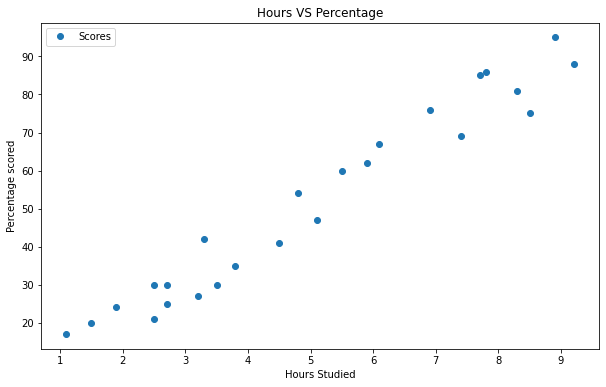

In [69]:
## Plotting the distribution of score
tab.plot(x='Hours',y='Scores',style='o',figsize=(10,6))
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()

**Hence, we see that there is a positive linear relation between the number of hours studied and percentage of score and so we use a linear regrssion model to pred.**

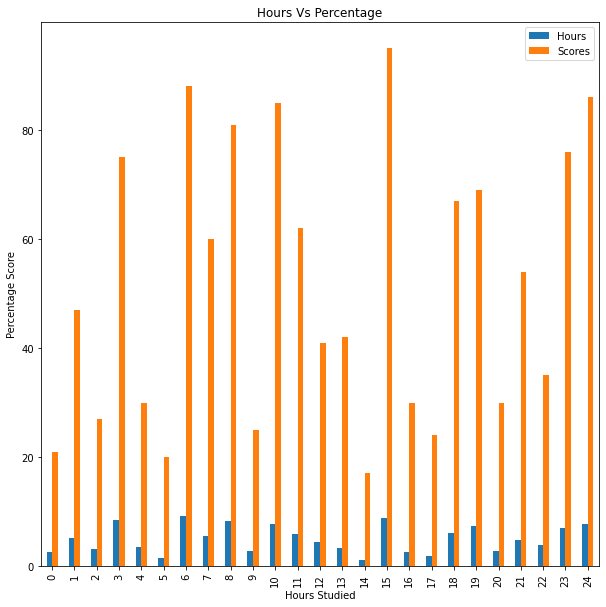

In [70]:
plt.rcParams["figure.figsize"] = (10, 10)
tab.plot(kind='bar')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')  
plt.show()

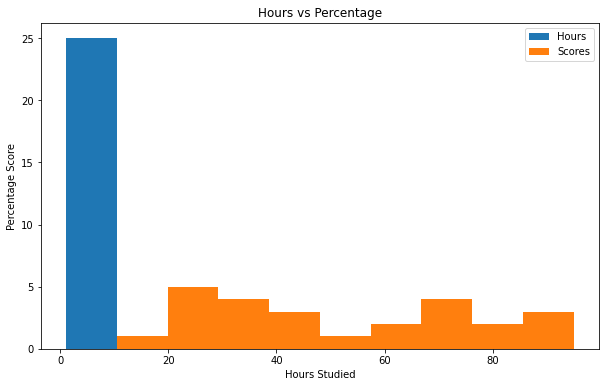

In [71]:
tab.plot(kind='hist',figsize=(10,6))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

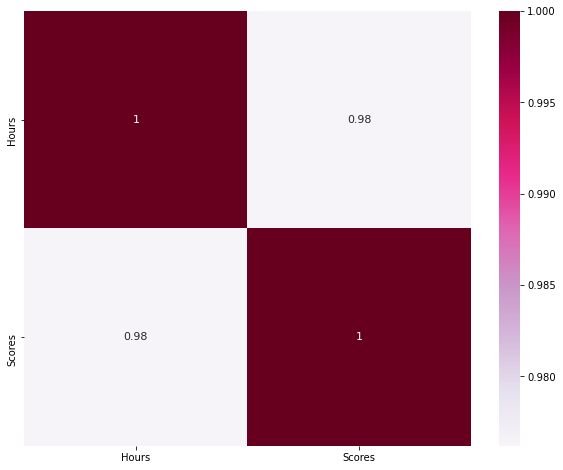

In [72]:
## checking the correlation
plt.figure(figsize=(10,8))
sns.heatmap(tab.corr(),annot=True,cmap='PuRd',annot_kws={'fontsize':11})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Correlation between the Scores and Hours of study is quite good, its about 98%

### Preparing Data for distribution into the test and train dataset to develop our model

In [102]:
## df.iloc[:, -1] it means the last column, but df.iloc[:, :-1] means until the last column.
X=tab.iloc[:,:-1].values
y=tab.iloc[:,1].values

In [103]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=0)

### Training the Model

In [104]:
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


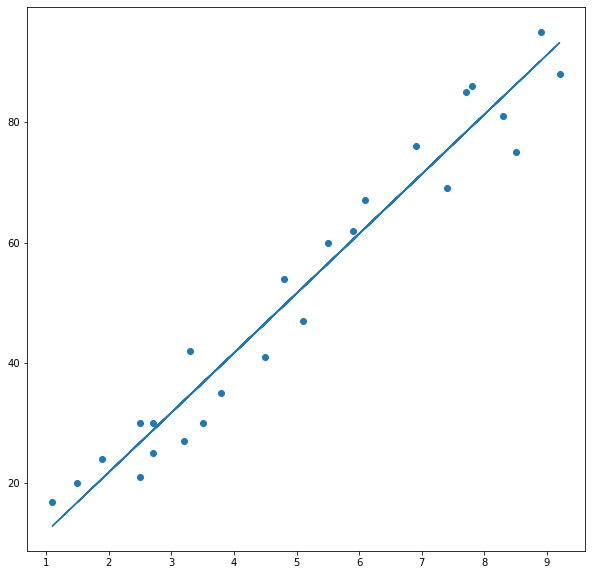

In [105]:
# Plotting the regression line

line = lr.coef_*X +lr.intercept_

## As equation of line for best fit line is y=m*x + c

####Plotting a scatter plot for x and y

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


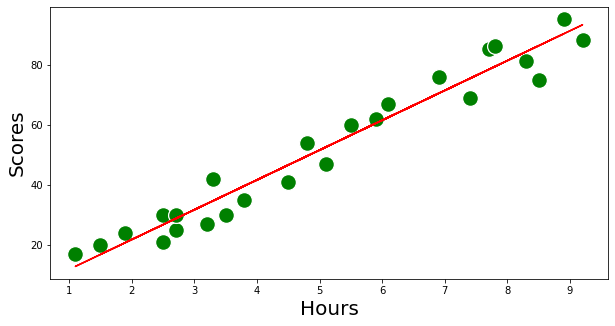

In [106]:
# Plotting the best fitted line on the graph  using sns
plt.figure(figsize=(10,5))
sns.scatterplot(tab['Hours'],tab['Scores'],s=250,color='g')
plt.plot(tab['Hours'],line,'r')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()

### Making Predictions

In [107]:
print(X_test) ##testing data in hours
y_pred=lr.predict(X_test) #predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted values

In [108]:
# Comparing Actual vs Predicted Scores
df_Compared = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Compared

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


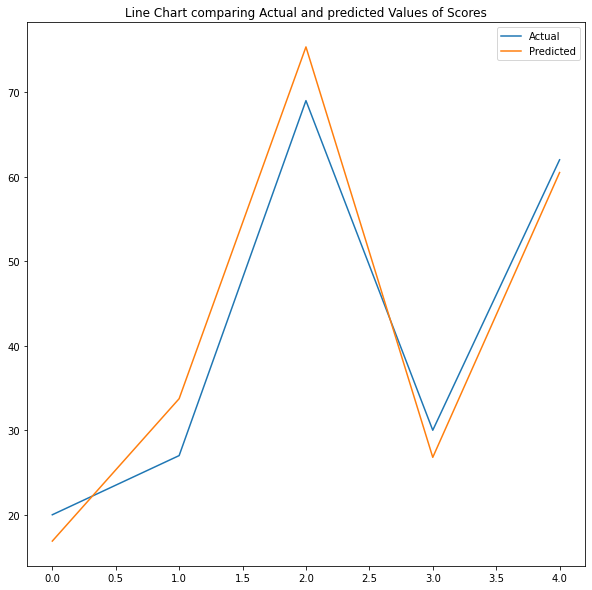

In [109]:
df_Compared.Actual.plot()
df_Compared.Predicted.plot()
plt.title('Line Chart comparing Actual and predicted Values of Scores')
plt.legend();

Text(0.5, 1.0, 'Comaparison between Actual and Predicted Score Values')

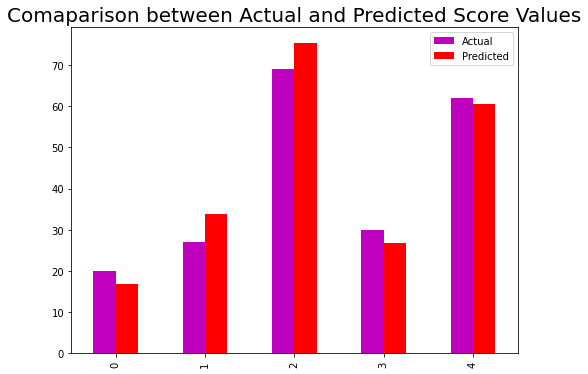

In [116]:
df_Compared.plot(kind='bar',figsize=(8,6), color=["m", "r"])
plt.title("Comaparison between Actual and Predicted Score Values",
                                                            fontsize=20)

### Testing on our required data

In [123]:
hours=np.array(9.25).reshape(-1,1)
own_pred=lr.predict(hours)
print('If the student reads for %0.3f hours then he will score %0.3f'%(9.25, own_pred[0]))

If the student reads for 9.250 hours then he will score 93.692


### Model Evaluation Metrics

In [140]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Square Error:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)


Mean Absolute Error: 4.183859899002975
Root Mean Square Error: 4.6474476121003665
R-Square: 0.9454906892105356


## The accuracy of the model is 94.55%. The mean absolute error is 4.18%

### We can see the value of the root mean squared error is 4.509 and the mean value of the percentages of all the students is 51.48 (from the statistical details obtained in cell no. 3). Here root mean squared error is less than 10% of the mean value of the percentages of all the student scores. Hence, it is safe to conclue the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.

In [142]:

import pickle
pickle_out = open('regressor.pickle', 'wb')
pickle.dump(regressor, pickle_out)
pickle_out.close()